In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

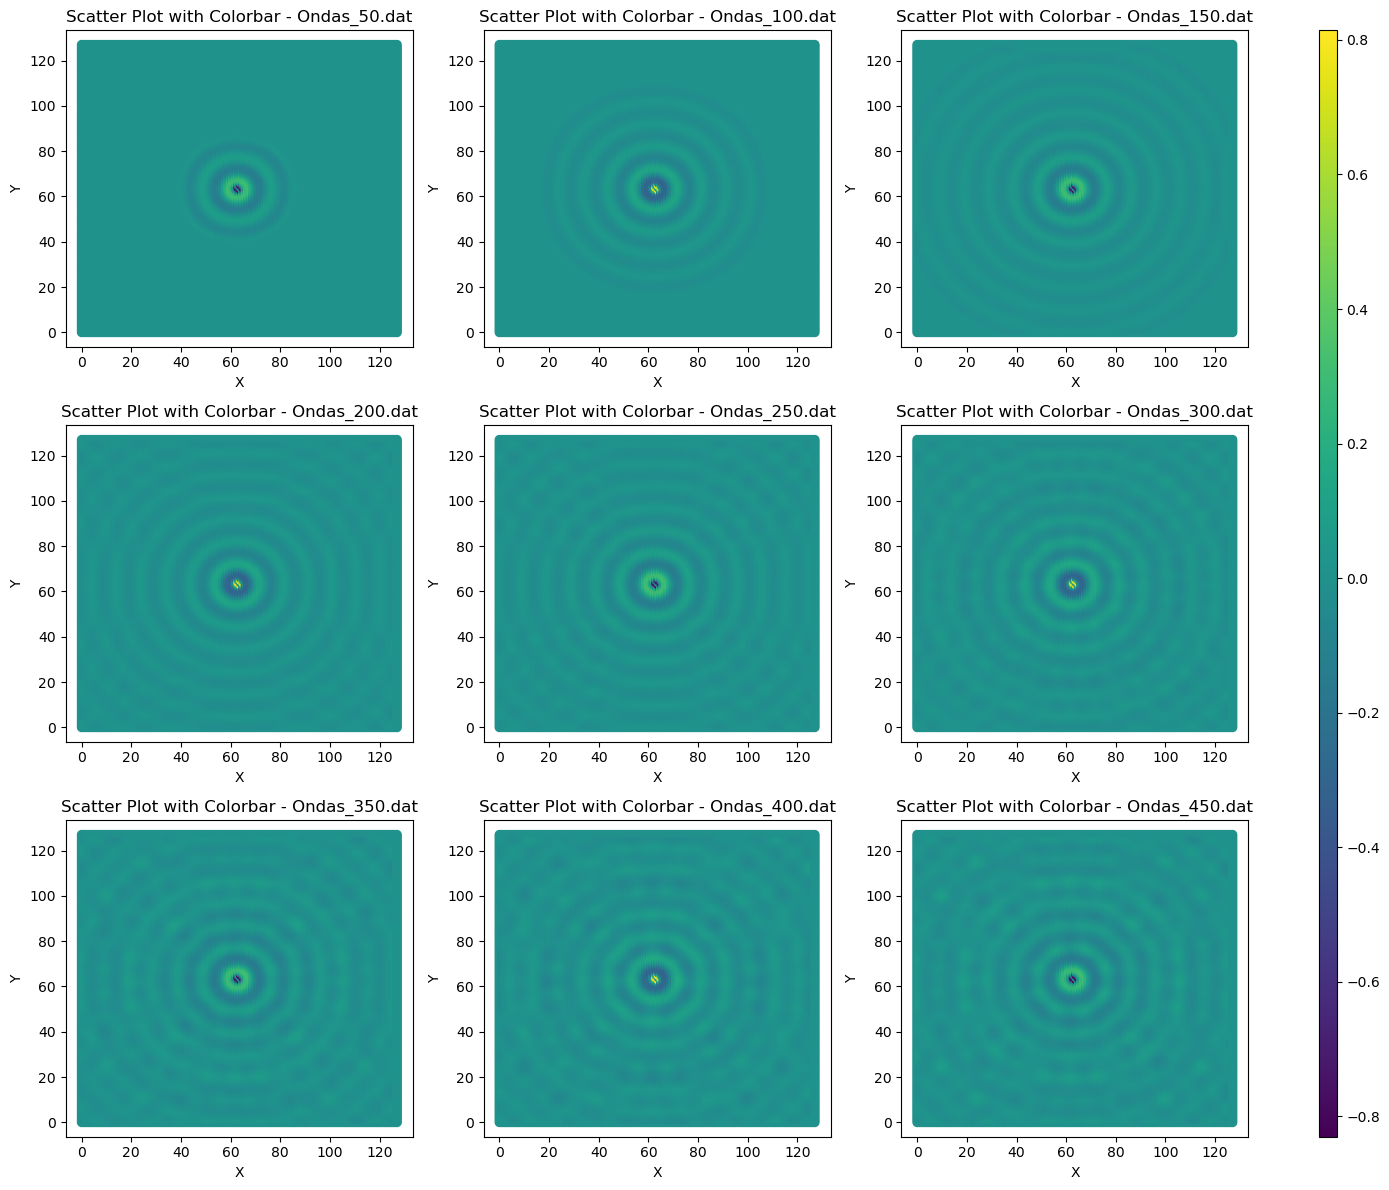

In [43]:

# Create a figure with custom layout
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(3, 4, width_ratios=[1, 1, 1, 0.05])

# Initialize variables to track global min and max
global_min = float('inf')
global_max = float('-inf')

# Read the data from the .dat files and calculate global min/max
for i in range(50, 460, 50):
    filename = f'Ondas_{i}.dat'
    data = np.loadtxt(filename)
    colorbar_values = data[:, 2]
    
    global_min = min(global_min, np.min(colorbar_values))
    global_max = max(global_max, np.max(colorbar_values))

# Now plot the data with consistent colorbar scales
for i in range(50, 460, 50):
    filename = f'Ondas_{i}.dat'
    data = np.loadtxt(filename)
    
    # Extract the columns
    x = data[:, 0]
    y = data[:, 1]
    colorbar = data[:, 2]

    # Calculate the row and column indices for the subplot
    index = (i // 50) - 1
    row = index // 3
    col = index % 3

    # Plot the data on the corresponding subplot
    ax = fig.add_subplot(gs[row, col])
    sc = ax.scatter(x, y, c=colorbar, vmin=global_min, vmax=global_max)
    ax.set_title(f'Scatter Plot with Colorbar - {filename}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# Add a shared colorbar
cax = fig.add_subplot(gs[:, 3])  # Create an axis for the colorbar
fig.colorbar(sc, cax=cax)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()